# 基于Pybroker框架的量化交易策略

* 量化交易策略平台：掘金，聚宽，米筐，优矿等
* 常见的量化交易策略库：Zipline、Backtrader、PyBroker等

## 什么是量化交易策略

量化交易策略是指通过数学模型和算法，对金融市场的价格、趋势、波动等数据进行挖掘和分析，从而制定出买卖股票、期货、外汇等金融产品的交易策略。

## pybroker框架

pybroker是一个基于Python的量化交易策略框架，它提供了一套完整的量化交易策略开发、回测、模拟和实盘交易的功能。

https://www.pybroker.com/zh-cn/latest/index.html

https://github.com/edtechre/pybroker/tree/master

* 库很新，学习资源少，除了官方文档，没有其他学习资料，借助大模型阅读源代码进行提问学习会有帮助
* 使用简单，速度快，支持在线akshare数据源也支持离线数据，对机器学习模型支持友好

## pybroker安装（本课程第一次课大部分同学已经完成安装不需要再走下面的流程）

* 直接pip通常可以：pip install lib-pybroker -i https://pypi.tuna.tsinghua.edu.cn/simple
* 建议先创建虚拟环境在再在虚拟环境中装库（如果直接装好能用那就不用搞虚拟环境）
* 如果想要和talib结合，某些版本因为numpy版本冲突，可能需要先安装ta-lib再安装pybroker

ta_lib安装需要下载对应版本的ta_lib库

https://github.com/cgohlke/talib-build/releases

## pybroker与akshare的使用

* 由于akshare是一个爬虫接口，对应数据源通常会不稳定，一旦出现异常常用手段就是保持更新

* pip install --upgrade lib-pybroker akshare -i https://pypi.tuna.tsinghua.edu.cn/simple

## pybroker 的数据形式与离线保存

* pybroker对数据的要求

* 离线保存后，pybroker会自动读取离线数据，避免总是网络获取

In [1]:
import pybroker
from pybroker.ext.data import AKShare
from pybroker import ExecContext, StrategyConfig, Strategy
from pybroker.ext.data import AKShare
import matplotlib.pyplot as plt

akshare = AKShare()

pybroker.enable_data_source_cache('akshare')

In [7]:
# 获取股票数据
# 你可以用000001替换000001.SZ，程序仍然可以正常运行！
# 并且你可以将起始日期设置为“20210301”这种格式。
# 你还可以将“adjust”设置为“qfq”（前复权）或“hfq”（后复权）来调整数据，
# 并将“timeframe”设置为“1d”（日数据）、“1w”（周数据）以获取每日、每周的数据。 
df = akshare.query(
    symbols=['000001.SZ', '600000.SH'],
    start_date='3/2/2021',
    end_date='3/1/2023',
    adjust="hfq",
    timeframe="1d",
)
df

Loaded cached bar data.



,date,symbol,open,high,low,close,volume
0,2021-03-02,000001.SZ,3653.44,3739.58,3594.93,3658.31,1473425
1,2021-03-03,000001.SZ,3646.94,3890.73,3627.43,3879.35,1919635
2,2021-03-04,000001.SZ,3840.34,3957.36,3820.84,3864.72,1213579
3,2021-03-05,000001.SZ,3828.97,3874.48,3692.44,3770.46,880171
4,2021-03-08,000001.SZ,3786.71,3827.34,3630.68,3650.19,993774
...,...,...,...,...,...,...,...
967,2023-02-23,600000.SH,77.41,77.61,77.28,77.28,114365
968,2023-02-24,600000.SH,77.22,77.48,76.95,76.95,166811
969,2023-02-27,600000.SH,76.82,77.08,76.82,76.82,158006
970,2023-02-28,600000.SH,76.95,77.08,76.69,76.95,174481


In [8]:
df = akshare.query(symbols='000001', start_date='20200101', end_date='20230830', adjust='')

Loaded cached bar data.



In [9]:
df

,date,symbol,open,high,low,close,volume
0,2020-01-02,000001,16.65,16.95,16.55,16.87,1530232
1,2020-01-03,000001,16.94,17.31,16.92,17.18,1116195
2,2020-01-06,000001,17.01,17.34,16.91,17.07,862084
3,2020-01-07,000001,17.13,17.28,16.95,17.15,728608
4,2020-01-08,000001,17.00,17.05,16.63,16.66,847824
...,...,...,...,...,...,...,...
884,2023-08-24,000001,11.29,11.32,11.05,11.13,1291271
885,2023-08-25,000001,11.10,11.33,11.08,11.23,845350
886,2023-08-28,000001,11.84,11.93,11.49,11.52,1997610
887,2023-08-29,000001,11.47,11.49,11.13,11.31,1964961


## 第一个量化策略

* 数据的导入

* 策略函数的编写与运行机制：每天每个股票都会运行一次

* 策略的结果分析

In [29]:

# 定义交易策略函数
def buy_func(ctx: ExecContext) -> None:
    pos = ctx.long_pos()  # 获取当前的长期持有的股票
    print(pos)
    #print(ctx.date[-1])
    #print(ctx.volume)
    #print(ctx.symbol)
    if pos:  # 如果当前持有股票
        #ctx.sell_shares = pos.shares  # 卖出所有的股票
        pass
    else:  # 如果当前没有持有股票
        ctx.buy_shares = ctx.calc_target_shares(0.5)  # 买入全部可购买的股票
        ctx.hold_bars = 3  # 设置持有的交易日为3天


# 创建策略配置对象，设置初始现金为 500,000 元
my_config = StrategyConfig(initial_cash=500000)

# 创建策略对象，设置数据源为 AKShare，开始日期为 '20230801'，结束日期为 '20230830'，策略配置为 my_config
strategy = Strategy(data_source=AKShare(), start_date='20230801', end_date='20230830', config=my_config)

# 将定义的交易策略函数添加到策略对象中，应用于股票 '000001'
strategy.add_execution(fn=buy_func, symbols=['000001',"600000"])

# 执行回测
result = strategy.backtest()

Backtesting: 2023-08-01 00:00:00 to 2023-08-30 00:00:00

Loaded cached bar data.

Test split: 2023-08-01 00:00:00 to 2023-08-30 00:00:00


  0% (0 of 22) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (22 of 22) |########################| Elapsed Time: 0:00:00 ETA:  00:00:00
100% (22 of 22) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


None
None
Position(symbol='000001', shares=Decimal('20559'), type='long', close=Decimal('12.03'), equity=Decimal('247324.77'), market_value=Decimal('247324.77'), margin=Decimal('0'), pnl=Decimal('-1027.95'), entries=deque([Entry(id=1, date=numpy.datetime64('2023-08-02T00:00:00.000000000'), symbol='000001', shares=Decimal('20559'), price=Decimal('12.08'), type='long', bars=0, stops=[Stop(id=145, symbol='000001', stop_type=<StopType.BAR: 'bar'>, pos_type='long', percent=None, points=None, bars=3, fill_price=<PriceType.MIDDLE: 'middle'>, limit_price=None, exit_price=None)], mae=Decimal('-0.15'), mfe=Decimal('0.16'))]), bars=0)
Position(symbol='600000', shares=Decimal('32894'), type='long', close=Decimal('7.48'), equity=Decimal('246047.12'), market_value=Decimal('246047.12'), margin=Decimal('0'), pnl=Decimal('-986.82'), entries=deque([Entry(id=2, date=numpy.datetime64('2023-08-02T00:00:00.000000000'), symbol='600000', shares=Decimal('32894'), price=Decimal('7.51'), type='long', bars=0, sto

<Axes: xlabel='date'>

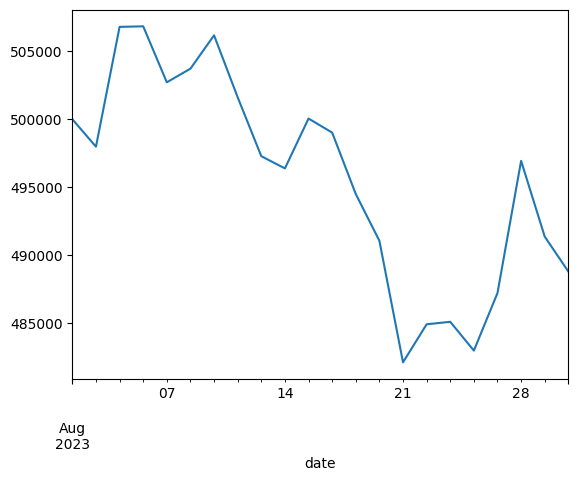

In [19]:
result.portfolio.equity.plot()

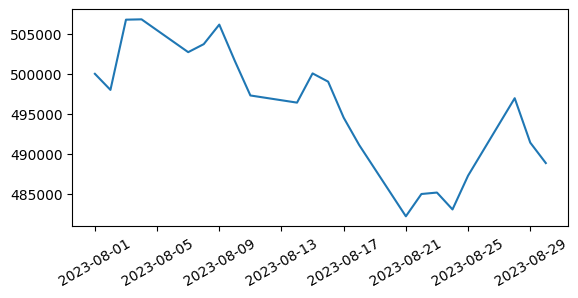

In [20]:

chart = plt.subplot2grid((5, 2), (0, 0), rowspan=3, colspan=2)
plt.xticks(rotation=30)
chart.plot(result.portfolio.index, result.portfolio['market_value'])


In [30]:
result.orders

,type,symbol,date,shares,limit_price,fill_price,fees
id,,,,,,,
1,buy,000001,2023-08-02,20559,NaN,12.08,0.0
2,buy,600000,2023-08-02,32894,NaN,7.51,0.0
3,sell,000001,2023-08-07,20559,NaN,12.18,0.0
4,sell,600000,2023-08-07,32894,NaN,7.53,0.0
5,buy,000001,2023-08-08,20670,NaN,12.10,0.0
6,buy,600000,2023-08-08,33425,NaN,7.49,0.0
7,sell,000001,2023-08-11,20670,NaN,12.08,0.0
8,sell,600000,2023-08-11,33425,NaN,7.34,0.0
9,buy,000001,2023-08-14,20911,NaN,11.68,0.0


In [31]:
result.portfolio

,cash,equity,margin,market_value,pnl,unrealized_pnl,fees
date,,,,,,,
2023-08-01,500000.00,500000.00,0.0,500000.00,0.00,0.0,0.0
2023-08-02,4613.34,497985.23,0.0,497985.23,-2014.77,0.0,0.0
2023-08-03,4613.34,506784.45,0.0,506784.45,6784.45,0.0,0.0
2023-08-04,4613.34,506825.56,0.0,506825.56,6825.56,0.0,0.0
2023-08-07,502713.78,502713.78,0.0,502713.78,2713.78,0.0,0.0
2023-08-08,2253.53,503716.53,0.0,503716.53,3716.53,0.0,0.0
2023-08-09,2253.53,506166.18,0.0,506166.18,6166.18,0.0,0.0
2023-08-10,2253.53,501614.23,0.0,501614.23,1614.23,0.0,0.0
2023-08-11,497286.63,497286.63,0.0,497286.63,-2713.37,0.0,0.0


In [32]:
result.positions

,,long_shares,short_shares,close,equity,market_value,margin,unrealized_pnl
symbol,date,,,,,,,
000001,2023-08-02,20559,0,12.03,247324.77,247324.77,0.0,-1027.95
600000,2023-08-02,32894,0,7.48,246047.12,246047.12,0.0,-986.82
000001,2023-08-03,20559,0,12.33,253492.47,253492.47,0.0,5139.75
600000,2023-08-03,32894,0,7.56,248678.64,248678.64,0.0,1644.70
000001,2023-08-04,20559,0,12.30,252875.70,252875.70,0.0,4522.98
600000,2023-08-04,32894,0,7.58,249336.52,249336.52,0.0,2302.58
000001,2023-08-08,20670,0,12.10,250107.00,250107.00,0.0,0.00
600000,2023-08-08,33425,0,7.52,251356.00,251356.00,0.0,1002.75
000001,2023-08-09,20670,0,12.17,251553.90,251553.90,0.0,1446.90


In [ ]:
result.trades

,type,symbol,entry_date,exit_date,entry,exit,shares,pnl,return_pct,agg_pnl,bars,pnl_per_bar,stop,mae,mfe
id,,,,,,,,,,,,,,,
1,long,000001,2023-08-02,2023-08-07,12.08,12.18,20559,2055.90,0.83,2055.90,3,685.30,bar,-0.15,0.45
2,long,600000,2023-08-02,2023-08-07,7.51,7.53,32894,657.88,0.27,2713.78,3,219.29,bar,-0.08,0.14
3,long,000001,2023-08-08,2023-08-11,12.10,12.08,20670,-413.40,-0.17,2300.38,3,-137.80,bar,-0.10,0.11
4,long,600000,2023-08-08,2023-08-11,7.49,7.34,33425,-5013.75,-2.00,-2713.37,3,-1671.25,bar,-0.15,0.06
5,long,000001,2023-08-14,2023-08-17,11.68,11.58,20911,-2091.10,-0.86,-4804.47,3,-697.03,bar,-0.10,0.17
6,long,600000,2023-08-14,2023-08-17,7.12,7.10,34390,-687.80,-0.28,-5492.27,3,-229.27,bar,-0.07,0.08
7,long,000001,2023-08-18,2023-08-23,11.64,11.33,21370,-6624.70,-2.66,-12116.97,3,-2208.23,bar,-0.33,0.10
8,long,600000,2023-08-18,2023-08-23,7.12,7.04,34516,-2761.28,-1.12,-14878.25,3,-920.43,bar,-0.16,0.05
9,long,000001,2023-08-24,2023-08-29,11.18,11.31,21560,2802.80,1.16,-12075.45,3,934.27,bar,-0.13,0.75


In [21]:
result.metrics_df

,name,value
0,trade_count,10.000000
1,initial_market_value,500000.000000
2,end_market_value,488816.610000
3,total_pnl,-8620.250000
4,unrealized_pnl,-2563.140000
5,total_return_pct,-1.724050
6,total_profit,8971.780000
7,total_loss,-17592.030000
8,total_fees,0.000000
9,max_drawdown,-24678.790000


### classwork1

设定，时间2023年整年，初始金额1000000，编写如下策略：


* 导入002594 比亚迪单个股票数据，一开始就购买一直持有到最后

* 导入002594 比亚迪和'000001' 股票数据，一开始就购买各50%，每次持有2天 

查看策略的收益曲线与各项指标


## Position对象 解读

```python
print(pos = ctx.long_pos())

Position(symbol='000001', shares=Decimal('41118'), type='long', close=Decimal('12.33'), equity=Decimal('506984.94'), market_value=Decimal('506984.94'), margin=Decimal('0'), pnl=Decimal('10279.50'), entries=deque([Entry(id=1, date=numpy.datetime64('2023-08-02T00:00:00.000000000'), symbol='000001', shares=Decimal('41118'), price=Decimal('12.08'), type='long', bars=1, stops=[Stop(id=63, symbol='000001', stop_type=<StopType.BAR: 'bar'>, pos_type='long', percent=None, points=None, bars=3, fill_price=<PriceType.MIDDLE: 'middle'>, limit_price=None, exit_price=None)], mae=Decimal('-0.15'), mfe=Decimal('0.29'))]), bars=1) 
```

这个对象是 `Position` 类的一个实例，`Position` 类用于表示一个未平仓的持仓信息。下面我们来详细解读这个对象的各个属性：

### 整体信息
这是一个关于股票代码为 `000001` 的多头持仓信息，包含了持仓的基本情况、成本、收益等信息。

### 具体属性解读

#### 1. 基础信息
- `symbol='000001'`：表示持仓的股票代码为 `000001`。
- `shares=Decimal('41118')`：表示持有的该股票的数量为 41118 股，使用 `Decimal` 类型是为了更精确地处理小数。
- `type='long'`：表示持仓类型为多头，即买入并持有股票，期望股票价格上涨获利。

#### 2. 价格与价值信息
- `close=Decimal('12.33')`：表示该股票的最新收盘价为 12.33 元。
- `equity=Decimal('506984.94')`：表示该持仓的权益价值，即当前持仓的总价值，计算方式为持仓数量乘以收盘价，$41118 \times 12.33 = 506984.94$。
- `market_value=Decimal('506984.94')`：表示该持仓的市场价值，在这个例子中与权益价值相等。
- `margin=Decimal('0')`：表示该持仓使用的保证金为 0，可能是全额现金买入，没有使用杠杆。

#### 3. 盈亏信息
- `pnl=Decimal('10279.50')`：表示该持仓的未实现盈亏，即当前持仓相对于买入成本的盈利金额。

#### 4. 持仓记录信息
- `entries=deque([Entry(...)])`：这是一个双端队列，包含了该持仓的所有入场记录。在这个例子中，只有一个入场记录：
  - `id=1`：入场记录的唯一标识符。
  - `date=numpy.datetime64('2023-08-02T00:00:00.000000000')`：表示入场日期为 2023 年 8 月 2 日。
  - `symbol='00001'`：股票代码。
  - `shares=Decimal('41118')`：入场时买入的股票数量。
  - `price=Decimal('12.08')`：入场时的买入价格。
  - `type='long'`：入场类型为多头。
  - `bars=1`：表示从入场到当前经过的周期数为 1。
  - `stops=[Stop(...)]`：这是一个止损或止盈策略列表，在这个例子中只有一个止损策略：
    - `id=63`：止损策略的唯一标识符。
    - `symbol='000001'`：股票代码。
    - `stop_type=<StopType.BAR: 'bar'>`：止损类型为按周期数止损，即经过一定周期后平仓。
    - `pos_type='long'`：适用于多头持仓。
    - `percent=None`：没有设置按百分比止损。
    - `points=None`：没有设置按点数止损。
    - `bars=3`：表示经过 3 个周期后触发止损。
    - `fill_price=<PriceType.MIDDLE: 'middle'>`：止损时的成交价格类型为中间价。
    - `limit_price=None`：没有设置限价。
    - `exit_price=None`：目前还没有触发止损，所以没有退出价格。
  - `mae=Decimal('-0.15')`：最大不利偏移，即从入场到当前，股票价格相对于入场价格的最大下跌幅度为 0.15 元。
  - `mfe=Decimal('0.29')`：最大有利偏移，即从入场到当前，股票价格相对于入场价格的最大上涨幅度为 0.29 元。

#### 5. 持仓周期信息
- `bars=1`：表示从该持仓建立到当前经过的周期数为 1。

综上所述，这个 `Position` 对象描述了一个在 2023 年 8 月 2 日以 12.08 元的价格买入 41118 股股票代码为 `000001` 的多头持仓，当前收盘价为 12.33 元，盈利 10279.50 元，设置了一个经过 3 个周期后触发的止损策略。 

## metrics_df对象解读

In [5]:
result.metrics_df

,name,value
0,trade_count,10.000000
1,initial_market_value,500000.000000
2,end_market_value,488816.610000
3,total_pnl,-8620.250000
4,unrealized_pnl,-2563.140000
5,total_return_pct,-1.724050
6,total_profit,8971.780000
7,total_loss,-17592.030000
8,total_fees,0.000000
9,max_drawdown,-24678.790000



这些指标是算法交易策略回测中常用的评估指标，用于衡量策略的性能、风险和盈利能力。下面是对每个指标的详细解释：

### 1. 交易数量与初始/最终市值
- **`trade_count`（交易次数）**：值为 10，代表在回测期间策略执行的交易总次数，包括买入和卖出操作。它反映了策略的交易活跃度。
- **`initial_market_value`（初始市值）**：初始投入资金为 500000，这是回测开始时投资组合的总价值。
- **`end_market_value`（最终市值）**：回测结束时投资组合价值为 488816.61，与初始市值对比可看出策略在回测期内是盈利还是亏损。

### 2. 盈亏相关指标
- **`total_pnl`（总盈亏）**：总盈亏为 -8620.25，即回测期间策略整体亏损 8620.25，是最终市值与初始市值的差值。
- **`unrealized_pnl`（未实现盈亏）**：未实现盈亏 -2563.14，指当前持有头寸按当前市场价格计算的盈亏，尚未通过交易实现。
- **`total_return_pct`（总回报率百分比）**：总回报率 -1.724050%，反映策略在回测期内的整体收益情况，计算公式为 `(最终市值 - 初始市值) / 初始市值 * 100%`。
- **`total_profit`（总盈利）**：总盈利 8971.78，是所有盈利交易的盈利总和。
- **`total_loss`（总亏损）**：总亏损 -17592.03，是所有亏损交易的亏损总和。

### 3. 交易成本与最大回撤
- **`total_fees`（总交易费用）**：总交易费用为 0，意味着回测中未考虑交易手续费、佣金等成本。
- **`max_drawdown`（最大回撤）**：最大回撤 -24678.79，指在回测期间投资组合从峰值到谷底的最大损失金额，反映策略可能面临的最大风险。
- **`max_drawdown_pct`（最大回撤百分比）**：最大回撤百分比 -4.869287%，是最大回撤金额相对于峰值市值的百分比，更直观体现回撤幅度。

### 4. 胜率与败率
- **`win_rate`（胜率）**：胜率 40%，表示盈利交易次数占总交易次数的比例，计算公式为 `盈利交易次数 / 总交易次数 * 100%`。
- **`loss_rate`（败率）**：败率 60%，即亏损交易次数占总交易次数的比例，计算公式为 `亏损交易次数 / 总交易次数 * 100%`。
- **`winning_trades`（盈利交易次数）**：盈利交易次数为 4，是回测中实现盈利的交易笔数。
- **`losing_trades`（亏损交易次数）**：亏损交易次数为 6，是回测中出现亏损的交易笔数。

### 5. 平均盈亏与持仓时间
- **`avg_pnl`（平均盈亏）**：平均盈亏 -862.025，是每次交易的平均盈利或亏损金额，计算公式为 `总盈亏 / 总交易次数`。
- **`avg_return_pct`（平均回报率百分比）**：平均回报率 -0.341%，是每次交易的平均回报率。
- **`avg_trade_bars`（平均交易周期）**：平均交易周期为 3，指每次交易平均持有的周期数（如天数、小时数等，取决于回测的时间粒度）。
- **`avg_profit`（平均盈利）**：平均盈利 2242.945，是每次盈利交易的平均盈利金额，计算公式为 `总盈利 / 盈利交易次数`。
- **`avg_profit_pct`（平均盈利百分比）**：平均盈利百分比 0.92%，是每次盈利交易的平均回报率。
- **`avg_winning_trade_bars`（平均盈利交易周期）**：平均盈利交易周期为 3，指每次盈利交易平均持有的周期数。
- **`avg_loss`（平均亏损）**：平均亏损 -2932.005，是每次亏损交易的平均亏损金额，计算公式为 `总亏损 / 亏损交易次数`。
- **`avg_loss_pct`（平均亏损百分比）**：平均亏损百分比 -1.181667%，是每次亏损交易的平均回报率。
- **`avg_losing_trade_bars`（平均亏损交易周期）**：平均亏损交易周期为 3，指每次亏损交易平均持有的周期数。

### 6. 最大盈利与亏损
- **`largest_win`（最大盈利）**：最大盈利 3455.2，是回测期间单笔交易的最大盈利金额。
- **`largest_win_pct`（最大盈利百分比）**：最大盈利百分比 1.42%，是单笔交易的最大回报率。
- **`largest_win_bars`（最大盈利交易周期）**：最大盈利交易周期为 3，指最大盈利交易持有的周期数。
- **`largest_loss`（最大亏损）**：最大亏损 -6624.7，是回测期间单笔交易的最大亏损金额。
- **`largest_loss_pct`（最大亏损百分比）**：最大亏损百分比 -2.66%，是单笔交易的最大亏损率。
- **`largest_loss_bars`（最大亏损交易周期）**：最大亏损交易周期为 3，指最大亏损交易持有的周期数。

### 7. 连续盈利与亏损
- **`max_wins`（最大连续盈利次数）**：最大连续盈利次数为 2，即回测期间连续盈利的最大交易次数。
- **`max_losses`（最大连续亏损次数）**：最大连续亏损次数为 6，即回测期间连续亏损的最大交易次数。

### 8. 风险调整指标
- **`sharpe`（夏普比率）**：夏普比率 -0.117967，衡量策略在承担单位风险时所能获得的超过无风险收益的额外收益，值越高越好，负值表示策略表现不如无风险投资。
- **`sortino`（索提诺比率）**：索提诺比率 -0.250087，与夏普比率类似，但只考虑下行风险，负值同样表示策略表现不佳。
- **`profit_factor`（盈利因子）**：盈利因子 0.746119，是总盈利与总亏损的绝对值之比，大于 1 表示策略总体盈利，小于 1 表示总体亏损。
- **`ulcer_index`（溃疡指数）**：溃疡指数 3.617931，衡量投资组合的回撤深度和持续时间，值越低表示策略的回撤控制越好。
- **`upi`（溃疡绩效指数）**：溃疡绩效指数 -0.028605，是总回报率与溃疡指数的比值，反映策略在控制回撤情况下的盈利能力，正值表示较好。

### 9. 拟合优度与标准误差
- **`equity_r2`（权益拟合优度）**：权益拟合优度 0.591262，反映策略的权益曲线与市场基准之间的拟合程度，值越接近 1 表示拟合度越高。
- **`std_error`（标准误差）**：标准误差 7674.257024，衡量策略实际表现与预期表现之间的偏离程度，值越小表示策略表现越稳定。

综合来看，这个策略在回测期间整体表现不佳，处于亏损状态，胜率较低，最大回撤和连续亏损情况也不太理想，风险调整后的收益指标为负，说明策略在控制风险和获取收益方面还有待改进。 

In [ ]:


# 定义交易策略函数
def buy_func(ctx: ExecContext) -> None:
    pos = ctx.long_pos()  # 获取当前的长期持有的股票
    if pos:  # 如果当前持有股票
        ctx.sell_shares = pos.shares  # 卖出所有的股票
    else:  # 如果当前没有持有股票
        ctx.buy_shares = ctx.calc_target_shares(1)  # 买入全部可购买的股票
        ctx.hold_bars = 3  # 设置持有的交易日为3天


# 创建策略配置对象，设置初始现金为 500,000 元
my_config = StrategyConfig(initial_cash=500000)

# 创建策略对象，设置数据源为 AKShare，开始日期为 '20230801'，结束日期为 '20230830'，策略配置为 my_config
strategy = Strategy(data_source=AKShare(), start_date='20230801', end_date='20230830', config=my_config)

# 将定义的交易策略函数添加到策略对象中，应用于股票 '000001'
strategy.add_execution(fn=buy_func, symbols=['000001'])

# 执行回测
result = strategy.backtest()

Loading bar data...


KeyError: '000001'

In [5]:
result

TestResult(start_date=datetime.datetime(2023, 8, 1, 0, 0), end_date=datetime.datetime(2023, 8, 30, 0, 0), portfolio=                 cash     equity  margin  market_value       pnl  \
date                                                               
2023-08-01  500000.00  500000.00     0.0     500000.00      0.00   
2023-08-02    3294.56  497944.10     0.0     497944.10  -2055.90   
2023-08-03  503289.44  503289.44     0.0     503289.44   3289.44   
2023-08-04       3.62  500441.42     0.0     500441.42    441.42   
2023-08-07  495559.10  495559.10     0.0     495559.10  -4440.90   
2023-08-08    2447.80  495559.10     0.0     495559.10  -4440.90   
2023-08-09  496374.16  496374.16     0.0     496374.16  -3625.84   
2023-08-10    1232.12  497189.88     0.0     497189.88  -2810.12   
2023-08-11  493927.00  493927.00     0.0     493927.00  -6073.00   
2023-08-14    8728.12  493511.59     0.0     493511.59  -6488.41   
2023-08-15  494757.82  494757.82     0.0     494757.82  -5242.18   


In [18]:
from pybroker import Strategy
from pybroker.ext.data import AKShare
from pybroker import highest

def exec_fn(ctx):
    # 获取 10 日最高价的指标数据
    high_10d = ctx.indicator('high_10d')
    # 如果没有多头仓位，且当前价格突破 10 日最高价，则买入 100 股
    if not ctx.long_pos() and high_10d[-1] > high_10d[-2]:
        ctx.buy_shares = 100
        # 持有 5 天
        ctx.hold_bars = 5
        # 设置 2% 的止损
        ctx.stop_loss_pct = 2

# 创建策略，使用 AKShare 数据源，指定开始和结束日期
strategy = Strategy(AKShare(), start_date='1/1/2023', end_date='7/1/2023')
# 添加执行函数，指定交易的股票代码和所需的指标
strategy.add_execution(
    exec_fn, 
    ['600000.SH', '000001.SZ'],  # 这里可以根据需要修改股票代码
    indicators=highest('high_10d', 'close', period=10)
)

# 进行回测，前 20 天作为预热期
result = strategy.backtest(warmup=20)

# 打印回测结果
print(result)

Backtesting: 2023-01-01 00:00:00 to 2023-07-01 00:00:00

Loading bar data...
Loaded bar data: 0:00:01 

Computing indicators...


  0% (0 of 2) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--
 50% (1 of 2) |#############             | Elapsed Time: 0:00:05 ETA:   0:00:05
100% (2 of 2) |##########################| Elapsed Time: 0:00:05 Time:  0:00:05



Test split: 2023-01-03 00:00:00 to 2023-06-30 00:00:00


  0% (0 of 118) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (118 of 118) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



Finished backtest: 0:00:06
TestResult(start_date=datetime.datetime(2023, 1, 1, 0, 0), end_date=datetime.datetime(2023, 7, 1, 0, 0), portfolio=                cash    equity  margin  market_value    pnl  unrealized_pnl  \
date                                                                          
2023-01-03  100000.0  100000.0     0.0      100000.0    0.0             0.0   
2023-01-04  100000.0  100000.0     0.0      100000.0    0.0             0.0   
2023-01-05  100000.0  100000.0     0.0      100000.0    0.0             0.0   
2023-01-06  100000.0  100000.0     0.0      100000.0    0.0             0.0   
2023-01-09  100000.0  100000.0     0.0      100000.0    0.0             0.0   
...              ...       ...     ...           ...    ...             ...   
2023-06-26   99873.7   99873.7     0.0       99873.7 -126.3             0.0   
2023-06-27   99873.7   99873.7     0.0       99873.7 -126.3             0.0   
2023-06-28   99873.7   99873.7     0.0       99873.7 -126.3        

In [19]:
import talib
from pybroker import Strategy
from pybroker.ext.data import AKShare


def exec_fn(ctx):
    close_prices = ctx.close
    # 使用 TA-Lib 计算 5 日简单移动平均线
    sma_5 = talib.SMA(close_prices, timeperiod=5)
    # 使用 TA-Lib 计算 20 日简单移动平均线
    sma_20 = talib.SMA(close_prices, timeperiod=20)

    # 检查是否发生黄金交叉
    if not ctx.long_pos() and sma_5[-1] > sma_20[-1] and sma_5[-2] <= sma_20[-2]:
        # 当发生黄金交叉且没有多头仓位时，买入 100 股
        ctx.buy_shares = 100
        # 设置 5% 的止损
        ctx.stop_loss_pct = 5

    # 检查是否发生死亡交叉（短期均线向下穿过长期均线）
    elif ctx.long_pos() and sma_5[-1] < sma_20[-1] and sma_5[-2] >= sma_20[-2]:
        # 当发生死亡交叉且持有多头仓位时，卖出所有股票
        ctx.sell_all_shares()


# 创建策略，使用 AKShare 作为数据源，设置回测的起始和结束日期
strategy = Strategy(AKShare(), start_date='2023-01-01', end_date='2023-12-31')

# 添加执行函数，指定交易的股票代码
strategy.add_execution(
    exec_fn,
    ['600000.SH'],  # 这里可以根据需要修改股票代码
)

# 进行回测，设置 20 天的预热期
result = strategy.backtest(warmup=20)

# 打印回测结果
print(result)

Backtesting: 2023-01-01 00:00:00 to 2023-12-31 00:00:00

Loading bar data...
Loaded bar data: 0:00:00 

Test split: 2023-01-03 00:00:00 to 2023-12-29 00:00:00


  0% (0 of 242) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (242 of 242) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



Finished backtest: 0:00:00
TestResult(start_date=datetime.datetime(2023, 1, 1, 0, 0), end_date=datetime.datetime(2023, 12, 31, 0, 0), portfolio=                cash    equity  margin  market_value   pnl  unrealized_pnl  \
date                                                                         
2023-01-03  100000.0  100000.0     0.0      100000.0   0.0             0.0   
2023-01-04  100000.0  100000.0     0.0      100000.0   0.0             0.0   
2023-01-05  100000.0  100000.0     0.0      100000.0   0.0             0.0   
2023-01-06  100000.0  100000.0     0.0      100000.0   0.0             0.0   
2023-01-09  100000.0  100000.0     0.0      100000.0   0.0             0.0   
...              ...       ...     ...           ...   ...             ...   
2023-12-25   99926.0   99926.0     0.0       99926.0 -74.0             0.0   
2023-12-26   99926.0   99926.0     0.0       99926.0 -74.0             0.0   
2023-12-27   99926.0   99926.0     0.0       99926.0 -74.0             0.0 

In [5]:
import talib
import pybroker

rsi_20 = pybroker.indicator('rsi_20', lambda data: talib.RSI(data.close, timeperiod=20))
rsi_20(df)

2021-03-01          NaN
2021-03-01          NaN
2021-03-02          NaN
2021-03-02          NaN
2021-03-03          NaN
                ...    
2023-02-27    48.687855
2023-02-28    51.196717
2023-02-28    48.697929
2023-03-01    51.345340
2023-03-01    48.728674
Length: 974, dtype: float64